## Sensor (PMU) Data Visualization and EDA

This notebook performs visualization and exploratory data analysis on electrical data captured by phasor measurement unit (PMU). 

In [158]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

Following is a picture of a electrical system of a university in Switzerland. There are 5 PMUs located on the network as seen below. In this notebook, data captured by PMU2 for an hour on 2016-01-01 is loaded for visulization and exploratory data analysis. Data consists of the following signals:

1. Timestamp
1. Frequency
1. Rate of change of Frequency (ROCOF)
1. Phase A Voltage phasor magnitude
1. Phase A Voltage phasor angle
1. Phase B Voltage phasor magnitude
1. Phase B Voltage phasor angle
1. Phase C Voltage phasor magnitude
1. Phase C Voltage phasor angle
1. Phase A Current phasor magnitude
1. Phase A Current phasor angle
1. Phase B Current phasor magnitude
1. Phase B Current phasor angle
1. Phase C Current phasor magnitude
1. Phase C Current phasor angle


![](./MAP_updated_web5.png)

In [3]:
pwd

'C:\\data\\work\\IOD\\DataScience\\Module2_Labs'

In [4]:
filepath = 'C:\\data\\work\\PMU_Data\\2016-01-01_00h_UTC_PMUID2.txt'
col_names=['GPS-locked?','timestamp','delay-at-arrival','frequency','rocof','phaseA.voltage.magnitude',
           'phaseA.voltage.angle','phaseA.current.magnitude','phaseA.current.angle','phaseB.voltage.magnitude',
           'phaseB.voltage.angle','phaseB.current.magnitude','phaseB.current.angle','phaseC.voltage.magnitude',
           'phaseC.voltage.angle','phaseC.current.magnitude','phaseC.current.angle']

In [43]:
df = pd.read_csv(filepath, sep='\t',skiprows=11, low_memory=False)

In [44]:
df.head()

,[column_data_units],flag,s,s.1,Hz,Hz/s,V,rad,A,rad.1,V.1,rad.2,A.1,rad.3,V.2,rad.4,A.2,rad.5
0,[d],1.0,1.451606e+09,0.043642,49.987217,0.008484,12169.27246,-2.491599,0.818743,0.505290,12149.97168,1.698879,0.843251,-1.731601,12206.22168,-0.393610,0.724472,2.486491
1,[d],1.0,1.451606e+09,0.043845,49.986218,-0.006647,12168.49902,-2.493214,0.813774,0.499682,12149.92480,1.697208,0.838602,-1.738664,12205.41016,-0.395315,0.715928,2.492280
2,[d],1.0,1.451606e+09,0.044049,49.985500,-0.021466,12168.47852,-2.494981,0.826716,0.498623,12149.83203,1.695430,0.842157,-1.736728,12205.20801,-0.397101,0.729665,2.497976
3,[d],1.0,1.451606e+09,0.043418,49.987190,-0.002771,12168.59668,-2.496746,0.827866,0.492787,12149.84277,1.693711,0.843593,-1.738041,12205.54395,-0.398832,0.730213,2.492679
4,[d],1.0,1.451606e+09,0.042766,49.986652,0.010129,12168.66309,-2.498354,0.827228,0.497451,12150.35352,1.692083,0.845877,-1.745496,12205.54785,-0.400469,0.726439,2.486942


In [45]:
df.tail()

,[column_data_units],flag,s,s.1,Hz,Hz/s,V,rad,A,rad.1,V.1,rad.2,A.1,rad.3,V.2,rad.4,A.2,rad.5
180005,Xl/AKfDz6uQlvDMNUmsb0rvt6xH3+KtPIWF517OszBBIWU...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180006,X7a6+PJGxiW2TDOP0xk/Io2cZA9xsmsw4WeekYutlcE1do...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180007,fOZqZl2L/jQveinKOEyl3losND3EMcX2p5J7c7pmcyEktR...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180008,=25JF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180009,-----END PGP SIGNATURE-----,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Cleaning
It can be seen that there are some rows with NaNs and redundant column (column_data_units). These can be removed from the dataset.

In [46]:
df.drop(columns=['[column_data_units]'], inplace=True)

In [47]:
print(df.dtypes)
print(df.columns)

flag     float64
s        float64
s.1      float64
Hz       float64
Hz/s     float64
V        float64
rad      float64
A        float64
rad.1    float64
V.1      float64
rad.2    float64
A.1      float64
rad.3    float64
V.2      float64
rad.4    float64
A.2      float64
rad.5    float64
dtype: object
Index(['flag', 's', 's.1', 'Hz', 'Hz/s', 'V', 'rad', 'A', 'rad.1', 'V.1',
       'rad.2', 'A.1', 'rad.3', 'V.2', 'rad.4', 'A.2', 'rad.5'],
      dtype='object')


In [48]:
df.shape
print(len(col_names))

17


In [49]:
df.isna().sum()

flag     10
s        10
s.1      10
Hz       10
Hz/s     10
V        10
rad      10
A        10
rad.1    10
V.1      10
rad.2    10
A.1      10
rad.3    10
V.2      10
rad.4    10
A.2      10
rad.5    10
dtype: int64

In [50]:
df.notna().sum(axis=1)

0         17
1         17
2         17
3         17
4         17
          ..
180005     0
180006     0
180007     0
180008     0
180009     0
Length: 180010, dtype: int64

In [51]:
df.dropna(inplace=True) #drops all rows with nan
df.columns = col_names

In [52]:
df.columns = col_names

In [53]:
df.head()

,GPS-locked?,timestamp,delay-at-arrival,frequency,rocof,phaseA.voltage.magnitude,phaseA.voltage.angle,phaseA.current.magnitude,phaseA.current.angle,phaseB.voltage.magnitude,phaseB.voltage.angle,phaseB.current.magnitude,phaseB.current.angle,phaseC.voltage.magnitude,phaseC.voltage.angle,phaseC.current.magnitude,phaseC.current.angle
0,1.0,1.451606e+09,0.043642,49.987217,0.008484,12169.27246,-2.491599,0.818743,0.505290,12149.97168,1.698879,0.843251,-1.731601,12206.22168,-0.393610,0.724472,2.486491
1,1.0,1.451606e+09,0.043845,49.986218,-0.006647,12168.49902,-2.493214,0.813774,0.499682,12149.92480,1.697208,0.838602,-1.738664,12205.41016,-0.395315,0.715928,2.492280
2,1.0,1.451606e+09,0.044049,49.985500,-0.021466,12168.47852,-2.494981,0.826716,0.498623,12149.83203,1.695430,0.842157,-1.736728,12205.20801,-0.397101,0.729665,2.497976
3,1.0,1.451606e+09,0.043418,49.987190,-0.002771,12168.59668,-2.496746,0.827866,0.492787,12149.84277,1.693711,0.843593,-1.738041,12205.54395,-0.398832,0.730213,2.492679
4,1.0,1.451606e+09,0.042766,49.986652,0.010129,12168.66309,-2.498354,0.827228,0.497451,12150.35352,1.692083,0.845877,-1.745496,12205.54785,-0.400469,0.726439,2.486942


### Date Conversion
The date format in the dataset is in UNIX based format. Converting it into yyyy-mm-dd HH:MM:SS format

In [54]:
import datetime

In [55]:
print(type(df.timestamp))

<class 'pandas.core.series.Series'>


In [56]:
df.timestamp=pd.to_datetime(df.timestamp,unit='s')


In [204]:
df.loc[1,'timestamp']-df.loc[0,'timestamp']

Timedelta('0 days 00:00:00.019999')

In [57]:
df.head()

,GPS-locked?,timestamp,delay-at-arrival,frequency,rocof,phaseA.voltage.magnitude,phaseA.voltage.angle,phaseA.current.magnitude,phaseA.current.angle,phaseB.voltage.magnitude,phaseB.voltage.angle,phaseB.current.magnitude,phaseB.current.angle,phaseC.voltage.magnitude,phaseC.voltage.angle,phaseC.current.magnitude,phaseC.current.angle
0,1.0,2016-01-01 00:00:00.000000000,0.043642,49.987217,0.008484,12169.27246,-2.491599,0.818743,0.505290,12149.97168,1.698879,0.843251,-1.731601,12206.22168,-0.393610,0.724472,2.486491
1,1.0,2016-01-01 00:00:00.019999981,0.043845,49.986218,-0.006647,12168.49902,-2.493214,0.813774,0.499682,12149.92480,1.697208,0.838602,-1.738664,12205.41016,-0.395315,0.715928,2.492280
2,1.0,2016-01-01 00:00:00.039999962,0.044049,49.985500,-0.021466,12168.47852,-2.494981,0.826716,0.498623,12149.83203,1.695430,0.842157,-1.736728,12205.20801,-0.397101,0.729665,2.497976
3,1.0,2016-01-01 00:00:00.059999943,0.043418,49.987190,-0.002771,12168.59668,-2.496746,0.827866,0.492787,12149.84277,1.693711,0.843593,-1.738041,12205.54395,-0.398832,0.730213,2.492679
4,1.0,2016-01-01 00:00:00.079999924,0.042766,49.986652,0.010129,12168.66309,-2.498354,0.827228,0.497451,12150.35352,1.692083,0.845877,-1.745496,12205.54785,-0.400469,0.726439,2.486942


In [58]:
df.tail()

,GPS-locked?,timestamp,delay-at-arrival,frequency,rocof,phaseA.voltage.magnitude,phaseA.voltage.angle,phaseA.current.magnitude,phaseA.current.angle,phaseB.voltage.magnitude,phaseB.voltage.angle,phaseB.current.magnitude,phaseB.current.angle,phaseC.voltage.magnitude,phaseC.voltage.angle,phaseC.current.magnitude,phaseC.current.angle
179995,1.0,2016-01-01 00:59:59.900000095,0.043940,49.981964,-0.005424,12145.96484,2.921964,0.838613,-0.356018,12122.00488,0.828752,0.856948,-2.621899,12175.18457,-1.263178,0.716377,1.623518
179996,1.0,2016-01-01 00:59:59.920000076,0.044265,49.980999,-0.009729,12145.93750,2.919708,0.831608,-0.353386,12122.39551,0.826342,0.851920,-2.628346,12174.23340,-1.265537,0.705298,1.621883
179997,1.0,2016-01-01 00:59:59.940000057,0.042727,49.982853,0.003339,12146.58691,2.917413,0.826749,-0.364290,12122.58594,0.824046,0.846159,-2.619441,12174.33203,-1.267813,0.712111,1.621420
179998,1.0,2016-01-01 00:59:59.960000038,0.043022,49.981606,0.008157,12146.16113,2.915189,0.821298,-0.364963,12122.85059,0.821865,0.851835,-2.622566,12174.40723,-1.270049,0.710923,1.611041
179999,1.0,2016-01-01 00:59:59.980000019,0.042221,49.981693,-0.007035,12146.13770,2.912869,0.827562,-0.374573,12122.47070,0.819561,0.854297,-2.618052,12174.22949,-1.272334,0.718616,1.614019


In [202]:
df.dtypes

GPS-locked?                        float64
timestamp                   datetime64[ns]
delay-at-arrival                   float64
frequency                          float64
rocof                              float64
phaseA.voltage.magnitude           float64
phaseA.voltage.angle               float64
phaseA.current.magnitude           float64
phaseA.current.angle               float64
phaseB.voltage.magnitude           float64
phaseB.voltage.angle               float64
phaseB.current.magnitude           float64
phaseB.current.angle               float64
phaseC.voltage.magnitude           float64
phaseC.voltage.angle               float64
phaseC.current.magnitude           float64
phaseC.current.angle               float64
phaseA_voltage_V                   float64
phaseB_voltage_V                   float64
phaseC_voltage_V                   float64
phaseA_current_A                   float64
phaseB_current_A                   float64
phaseC_current_A                   float64
phaseA_powe

In [201]:
df.loc[179999,'timestamp']-df.loc[0,'timestamp']

Timedelta('0 days 00:59:59.980000')

In [60]:
df.columns

Index(['GPS-locked?', 'timestamp', 'delay-at-arrival', 'frequency', 'rocof',
       'phaseA.voltage.magnitude', 'phaseA.voltage.angle',
       'phaseA.current.magnitude', 'phaseA.current.angle',
       'phaseB.voltage.magnitude', 'phaseB.voltage.angle',
       'phaseB.current.magnitude', 'phaseB.current.angle',
       'phaseC.voltage.magnitude', 'phaseC.voltage.angle',
       'phaseC.current.magnitude', 'phaseC.current.angle'],
      dtype='object')

In [176]:
df.describe()

,GPS-locked?,delay-at-arrival,frequency,rocof,phaseA.voltage.magnitude,phaseA.voltage.angle,phaseA.current.magnitude,phaseA.current.angle,phaseB.voltage.magnitude,phaseB.voltage.angle,...,phaseC.current.angle,phaseA_voltage_V,phaseB_voltage_V,phaseC_voltage_V,phaseA_current_A,phaseB_current_A,phaseC_current_A,phaseA_power_W,phaseB_power_W,phaseC_power_W
count,180000.0,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,...,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000,180000.000000
mean,1.0,0.043435,50.000520,0.000007,12132.706999,-0.115991,0.828062,0.240400,12113.221102,-0.100477,...,-0.135447,473.073385,-948.262169,475.203938,-0.025812,0.067458,-0.041674,-561.806156,-469.389185,758.302987
std,0.0,0.000603,0.017623,0.010154,20.366965,1.783739,0.023584,1.835941,19.636242,1.905893,...,1.836788,8831.261573,8598.448617,8224.924737,0.599184,0.625594,0.491518,6947.066070,7517.433971,6187.957434
min,1.0,0.041661,49.947170,-1.115227,11947.608400,-3.141513,0.771214,-3.141572,11959.291990,-3.141583,...,-3.141589,-12169.355988,-12144.311027,-12199.419642,-0.993499,-0.955659,-0.887298,-12020.018610,-11675.290841,-10893.384026
25%,1.0,0.043060,49.993427,-0.005106,12111.972660,-1.511421,0.813558,-1.272467,12094.075928,-1.909247,...,-1.802640,-9037.920743,-9670.614536,-7222.500668,-0.624376,-0.547142,-0.502687,-7302.587733,-8055.771574,-5216.779294
50%,1.0,0.043423,50.004906,-0.000050,12135.840820,-0.284756,0.826558,0.314271,12114.761720,-0.026700,...,-0.306984,1513.935073,-1317.401309,845.362858,-0.087173,0.092456,-0.079024,-1166.591224,-1105.783275,1247.996817
75%,1.0,0.043815,50.013283,0.005055,12149.822270,1.360631,0.839576,1.915644,12129.313480,1.534194,...,1.531367,9270.588675,7541.956538,8351.423569,0.603748,0.711781,0.417946,6320.982168,7199.694823,6903.060264
max,1.0,0.060124,50.029602,1.205889,12173.092770,3.141568,0.996529,3.141551,12153.659180,3.141565,...,3.141550,12166.270061,12146.628737,12198.327802,0.981989,0.969441,0.850213,11432.231890,12069.834362,9698.723181


## Exploring Distribution of Current Phasor Measurements

Following histograms show distribution of magnitude of current phasors in three phases. Also plotted is box plot. It can be seen from the box plot that there is unbalance in the phase current magnitudes as distributions are different.


In [23]:
import seaborn as sns

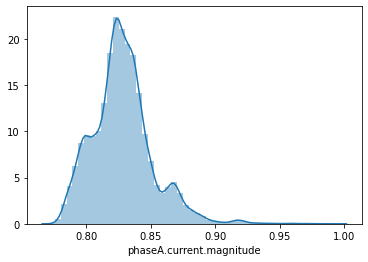

In [173]:
sns.distplot(df['phaseA.current.magnitude'],kde=True)

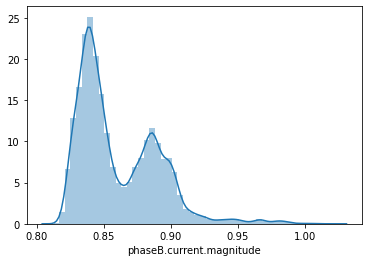

In [174]:
sns.distplot(df['phaseB.current.magnitude'],kde=True)

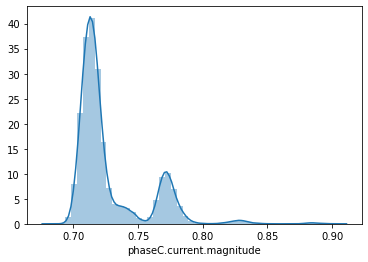

In [175]:
sns.distplot(df['phaseC.current.magnitude'],kde=True)

## OUTLIERS
Box plot below shows presence of many outliers in all three phases, which is also evident from the time series plot presented further ahead.

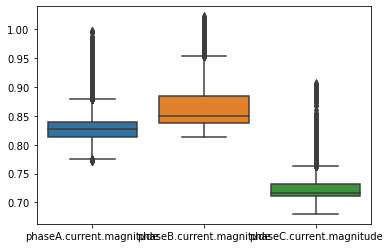

In [168]:
sns.boxplot(data=df[['phaseA.current.magnitude','phaseB.current.magnitude','phaseC.current.magnitude']])

### Time Series Plot of phase current magnitude. 

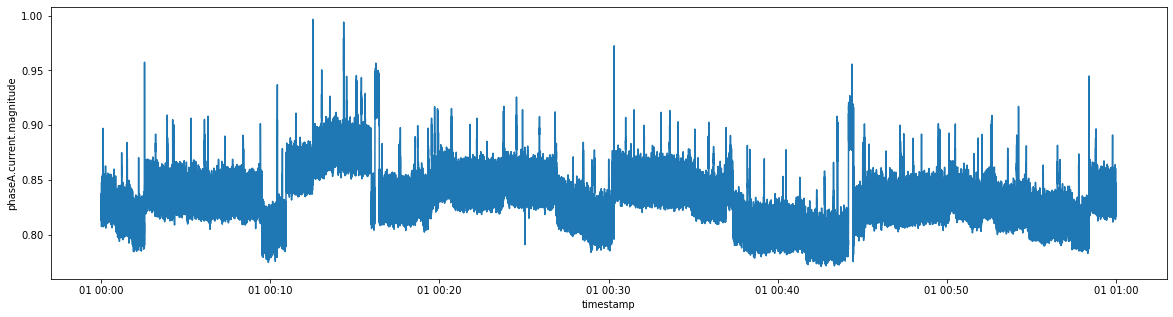

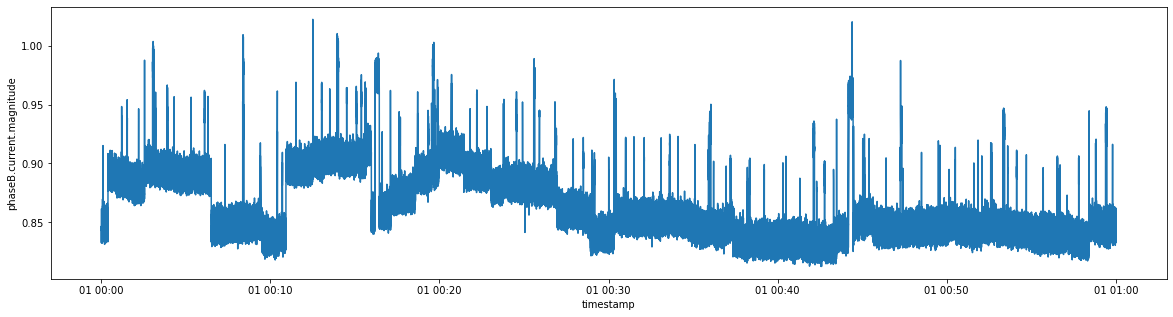

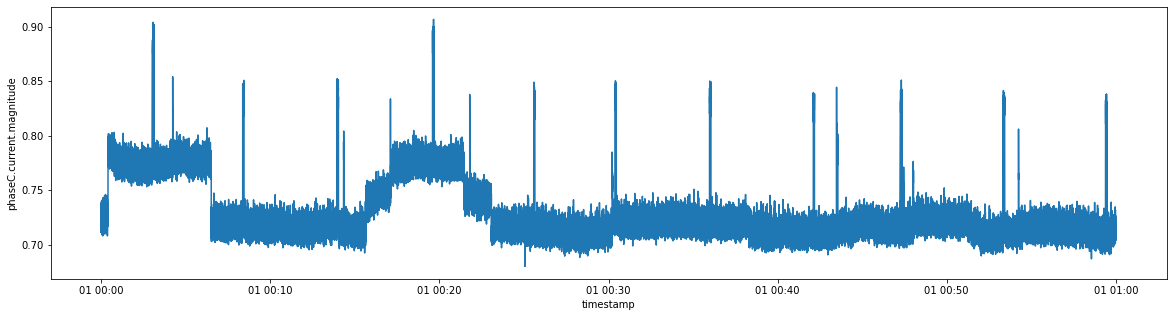

In [208]:
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x='timestamp',y='phaseA.current.magnitude',data=df)

f1, ax1 = plt.subplots(figsize=(20, 5))
sns.lineplot(x='timestamp',y='phaseB.current.magnitude',data=df)

f2, ax2 = plt.subplots(figsize=(20, 5))
sns.lineplot(x='timestamp',y='phaseC.current.magnitude',data=df)

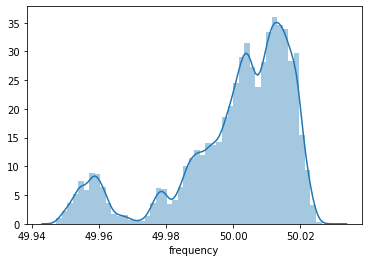

In [92]:
sns.distplot(df['frequency'],kde=True)

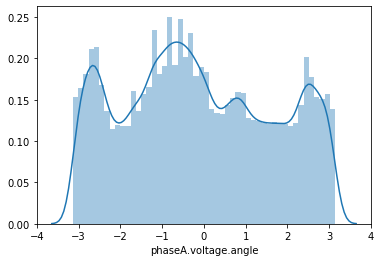

In [94]:
sns.distplot(df['phaseA.voltage.angle'],kde=True)

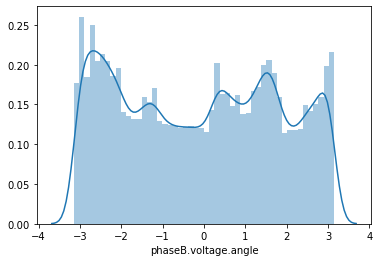

In [95]:
sns.distplot(df['phaseB.voltage.angle'],kde=True)

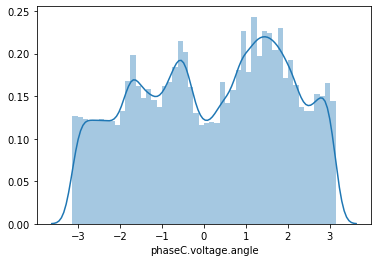

In [96]:
sns.distplot(df['phaseC.voltage.angle'],kde=True)

## SCATTER PLOT - Evidence of clustering, correlation...

The following plot tries to visualize any correlation betweeen frequency and phase current magnitudes. It can be seen in the plot that some clustering is happening in the dataset. Distribution of frequency is bimodal, indicating two different clusters of frequency values and this clustering is also expected to be evident in frequency versus phase current magnitude plot in the first row.

And some degee of correlation is evident between phase current magnitudes as seen in scatter plot of phase currents.

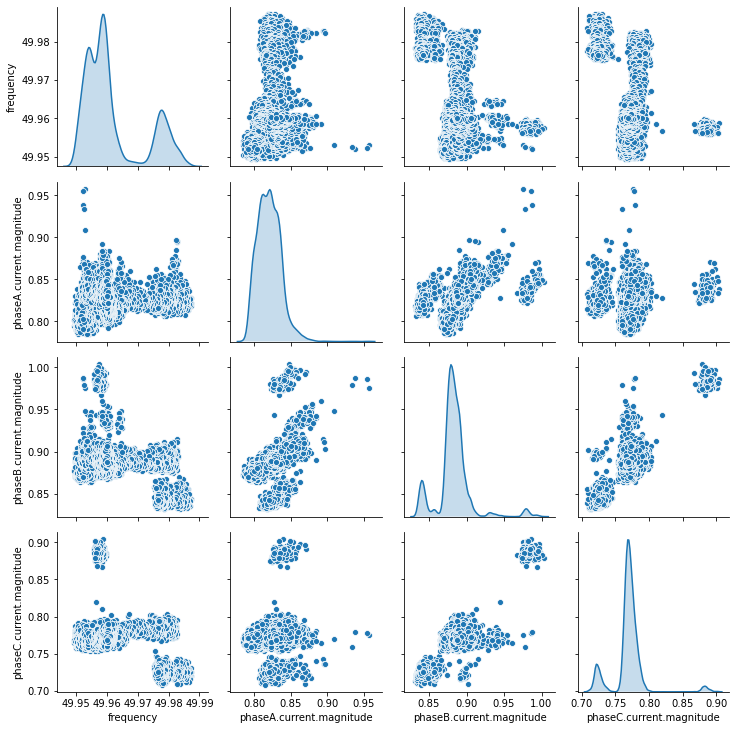

In [170]:
colnames=['frequency', 'phaseA.current.magnitude','phaseB.current.magnitude','phaseC.current.magnitude']
sns.pairplot(df.loc[:10000,:],x_vars=colnames,y_vars=colnames, diag_kind = 'kde')

## Comparison of signals at different locations

In order to visualize any differnce in frequency measurement at different locations, PMU data at another location is loaded and scatter plot of frequency measurement at these two locations is created. For a small electrical network like this, it is expected that frequency measurements will be the same. 

In [82]:

filepath = 'C:\\data\\work\\PMU_Data\\2016-01-01_00h_UTC_PMUID3.txt'
col_names=['GPS-locked?','timestamp','delay-at-arrival','frequency','rocof','phaseA.voltage.magnitude',
           'phaseA.voltage.angle','phaseA.current.magnitude','phaseA.current.angle','phaseB.voltage.magnitude',
           'phaseB.voltage.angle','phaseB.current.magnitude','phaseB.current.angle','phaseC.voltage.magnitude',
           'phaseC.voltage.angle','phaseC.current.magnitude','phaseC.current.angle']
df1 = pd.read_csv(filepath, sep='\t',skiprows=11, low_memory=False)

In [83]:
df1.head()

,[column_data_units],flag,s,s.1,Hz,Hz/s,V,rad,A,rad.1,V.1,rad.2,A.1,rad.3,V.2,rad.4,A.2,rad.5
0,[d],1.0,1.451606e+09,0.043642,49.987217,0.008484,12169.27246,-2.491599,0.818743,0.505290,12149.97168,1.698879,0.843251,-1.731601,12206.22168,-0.393610,0.724472,2.486491
1,[d],1.0,1.451606e+09,0.043845,49.986218,-0.006647,12168.49902,-2.493214,0.813774,0.499682,12149.92480,1.697208,0.838602,-1.738664,12205.41016,-0.395315,0.715928,2.492280
2,[d],1.0,1.451606e+09,0.044049,49.985500,-0.021466,12168.47852,-2.494981,0.826716,0.498623,12149.83203,1.695430,0.842157,-1.736728,12205.20801,-0.397101,0.729665,2.497976
3,[d],1.0,1.451606e+09,0.043418,49.987190,-0.002771,12168.59668,-2.496746,0.827866,0.492787,12149.84277,1.693711,0.843593,-1.738041,12205.54395,-0.398832,0.730213,2.492679
4,[d],1.0,1.451606e+09,0.042766,49.986652,0.010129,12168.66309,-2.498354,0.827228,0.497451,12150.35352,1.692083,0.845877,-1.745496,12205.54785,-0.400469,0.726439,2.486942


In [84]:
df1.drop(columns=['[column_data_units]'], inplace=True)

In [85]:
df1.tail()

,flag,s,s.1,Hz,Hz/s,V,rad,A,rad.1,V.1,rad.2,A.1,rad.3,V.2,rad.4,A.2,rad.5
180005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180006,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
180009,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [86]:
df1.dropna(inplace=True) #drops all rows with nan
df1.columns = col_names

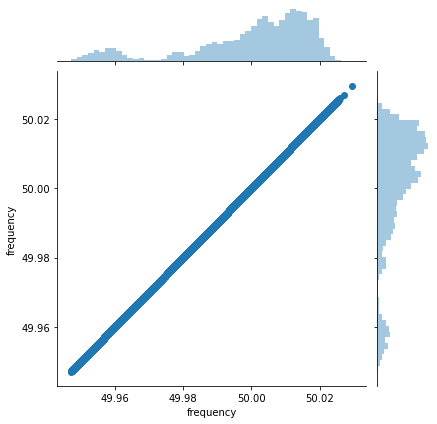

In [87]:
sns.jointplot(df.frequency,df1.frequency)

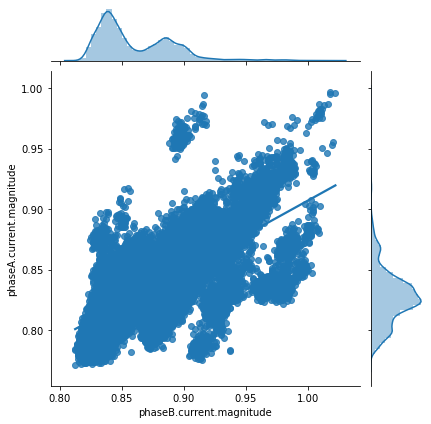

In [209]:
sns.jointplot(df['phaseB.current.magnitude'],df['phaseA.current.magnitude'], kind='reg')

## Visualizing clustering using Kernel Density Contours

The scatter plot below does not show the clustering effect of frequency. In order to visualize that, contour plot of kernel density is created, where clustering is clearly evident.

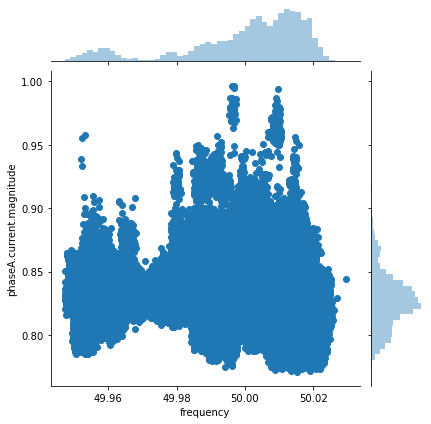

In [73]:
sns.jointplot(df['frequency'],df['phaseA.current.magnitude'])

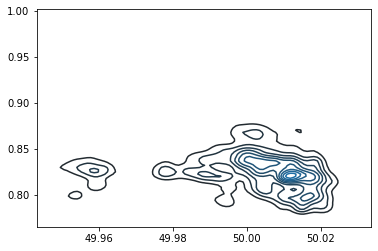

In [80]:
sns.kdeplot(df[['frequency','phaseA.current.magnitude']])

## Calculating time domain signals from phasors 

In code cell below, current and voltage phasors are converted to time domain signals for visualization

In [101]:
col_names=['delay-at-arrival','frequency','rocof','phaseA.voltage.magnitude',
           'phaseA.voltage.angle','phaseA.current.magnitude','phaseA.current.angle','phaseB.voltage.magnitude',
           'phaseB.voltage.angle','phaseB.current.magnitude','phaseB.current.angle','phaseC.voltage.magnitude',
           'phaseC.voltage.angle','phaseC.current.magnitude','phaseC.current.angle']


In [134]:
df['phaseA_voltage_V'] = df[['phaseA.voltage.magnitude']].to_numpy() * np.cos(df[['phaseA.voltage.angle']].to_numpy())
df['phaseB_voltage_V'] = df[['phaseB.voltage.magnitude']].to_numpy() * np.cos(df[['phaseB.voltage.angle']].to_numpy())
df['phaseC_voltage_V'] = df[['phaseC.voltage.magnitude']].to_numpy() * np.cos(df[['phaseC.voltage.angle']].to_numpy())
df['phaseA_current_A'] = df[['phaseA.current.magnitude']].to_numpy() * np.cos(df[['phaseA.current.angle']].to_numpy())
df['phaseB_current_A'] = df[['phaseB.current.magnitude']].to_numpy() * np.cos(df[['phaseB.current.angle']].to_numpy())
df['phaseC_current_A'] = df[['phaseC.current.magnitude']].to_numpy() * np.cos(df[['phaseC.current.angle']].to_numpy())


In [130]:
df['phaseA_voltage_V'].head()

0   -9687.807996
1   -9699.074832
2   -9712.027518
3   -9725.044960
4   -9736.846068
Name: phaseA_voltage_V, dtype: float64

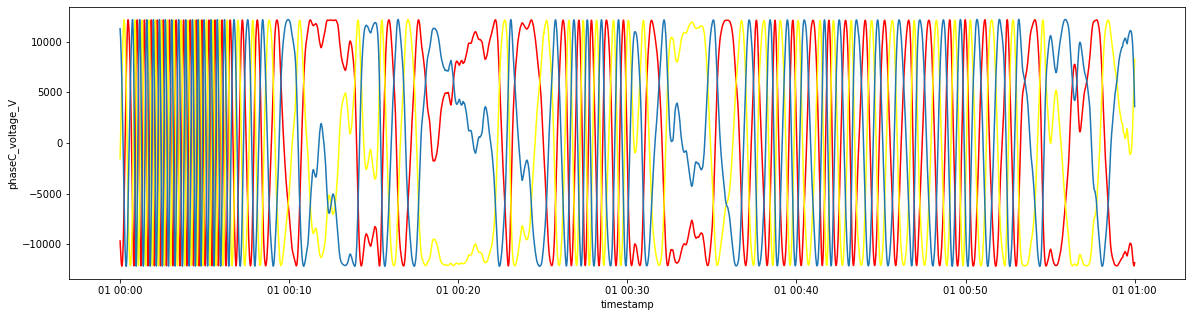

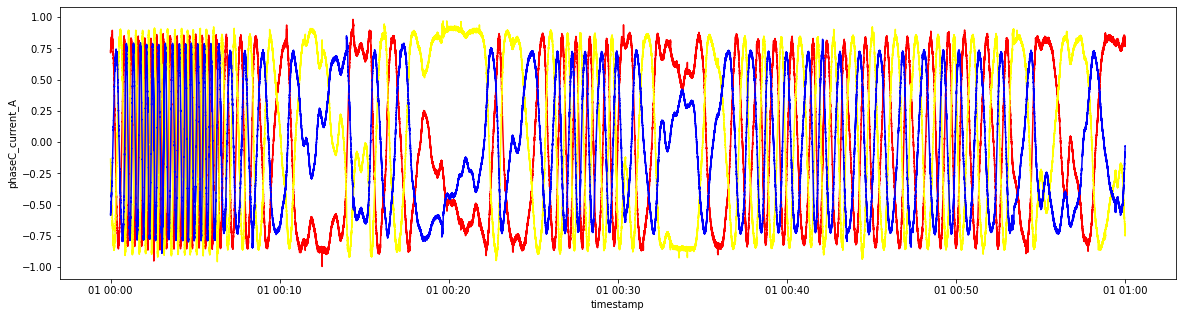

In [136]:
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x='timestamp',y='phaseA_voltage_V',data=df,color='red')
#f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x='timestamp',y='phaseB_voltage_V',data=df,color='yellow')
#f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x='timestamp',y='phaseC_voltage_V',data=df)
f1, ax1 = plt.subplots(figsize=(20, 5))
sns.lineplot(x='timestamp',y='phaseA_current_A',data=df,color='red')
#f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x='timestamp',y='phaseB_current_A',data=df,color='yellow')
#f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x='timestamp',y='phaseC_current_A',data=df,color='blue')




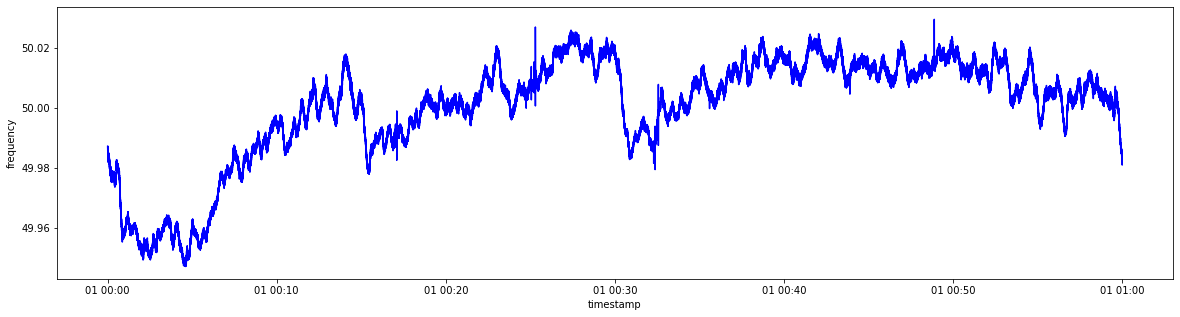

In [138]:
f2, ax2 = plt.subplots(figsize=(20, 5))
sns.lineplot(x='timestamp',y='frequency',data=df,color='blue')

## Scatter plot of time domain signals with frequency

The presence of periodic sinusoidal signal is clearly seen in the scatter plot below of voltages and currents. With frequency, clustering is expected as before. 

In [143]:
col_names_amp=['frequency','phaseA_voltage_V','phaseB_voltage_V','phaseC_voltage_V','phaseA_current_A','phaseB_current_A','phaseC_current_A']

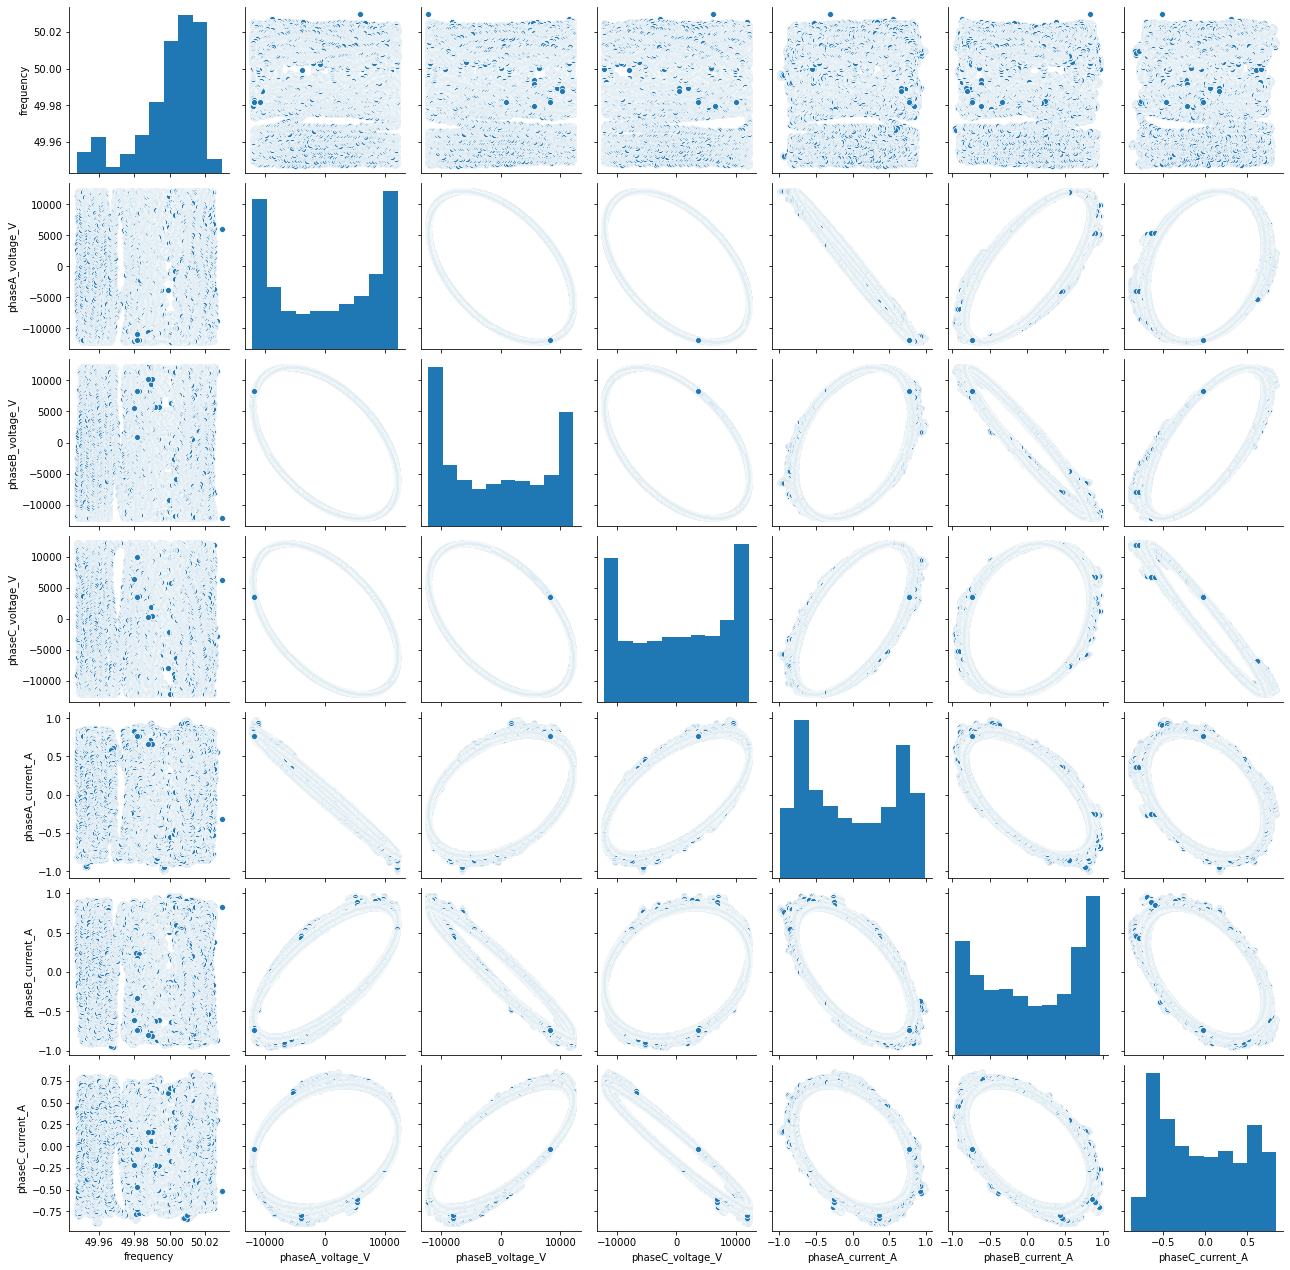

In [144]:
sns.pairplot(df[col_names_amp])

## Calculation of power in time domain

In [145]:
df['phaseA_power_W'] = df[['phaseA.voltage.magnitude']].to_numpy() * df[['phaseA.current.magnitude']].to_numpy() * np.cos(df[['phaseA.voltage.angle']].to_numpy()+df[['phaseA.current.angle']].to_numpy())
df['phaseB_power_W'] = df[['phaseB.voltage.magnitude']].to_numpy() * df[['phaseB.current.magnitude']].to_numpy() * np.cos(df[['phaseB.voltage.angle']].to_numpy()+df[['phaseB.current.angle']].to_numpy())
df['phaseC_power_W'] = df[['phaseC.voltage.magnitude']].to_numpy() * df[['phaseC.current.magnitude']].to_numpy() * np.cos(df[['phaseC.voltage.angle']].to_numpy()+df[['phaseC.current.angle']].to_numpy())

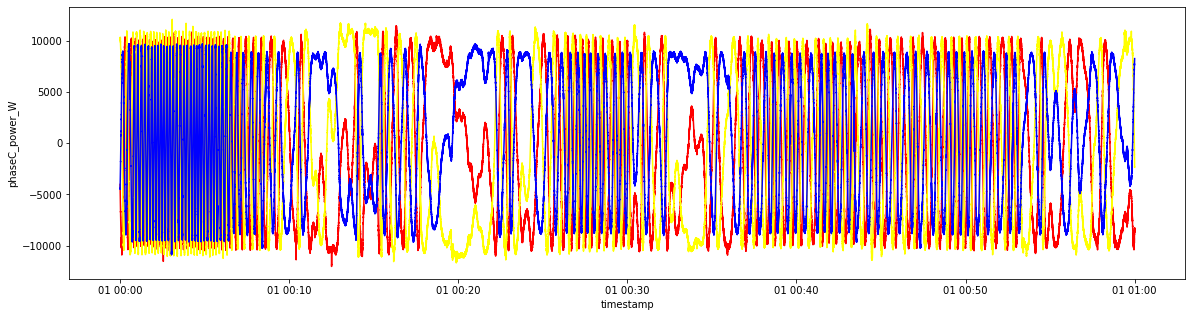

In [146]:
f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x='timestamp',y='phaseA_power_W',data=df,color='red')
sns.lineplot(x='timestamp',y='phaseB_power_W',data=df,color='yellow')
sns.lineplot(x='timestamp',y='phaseC_power_W',data=df,color='blue')

In [104]:
corr_coef = df[col_names].corr()

In [105]:
corr_coef.head()


,delay-at-arrival,frequency,rocof,phaseA.voltage.magnitude,phaseA.voltage.angle,phaseA.current.magnitude,phaseA.current.angle,phaseB.voltage.magnitude,phaseB.voltage.angle,phaseB.current.magnitude,phaseB.current.angle,phaseC.voltage.magnitude,phaseC.voltage.angle,phaseC.current.magnitude,phaseC.current.angle
delay-at-arrival,1.000000,0.052699,0.001903,-0.031666,0.004037,-0.034563,-0.006062,-0.031675,0.007360,-0.053147,-0.007204,-0.033859,-0.011841,-0.036917,0.009869
frequency,0.052699,1.000000,0.018960,-0.179720,0.003465,-0.145765,-0.004340,-0.152988,0.000205,-0.354801,0.004737,-0.187794,-0.001618,-0.567432,-0.000839
rocof,0.001903,0.018960,1.000000,0.000538,0.004575,0.000982,-0.000848,0.000857,-0.006224,-0.001051,0.007408,0.000621,0.002024,-0.001914,-0.006650
phaseA.voltage.magnitude,-0.031666,-0.179720,0.000538,1.000000,-0.146945,0.186878,0.106042,0.995257,-0.031286,0.244678,0.003303,0.994843,0.114995,0.207780,-0.106537
phaseA.voltage.angle,0.004037,0.003465,0.004575,-0.146945,1.000000,0.037080,-0.471416,-0.138892,-0.292479,-0.031571,0.314982,-0.142160,-0.304099,-0.069683,0.025747


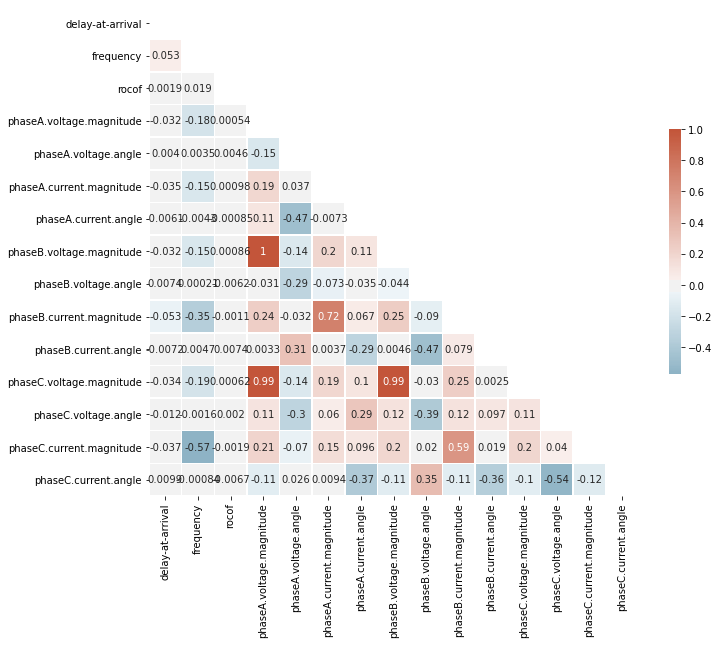

In [109]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_coef, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_coef, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

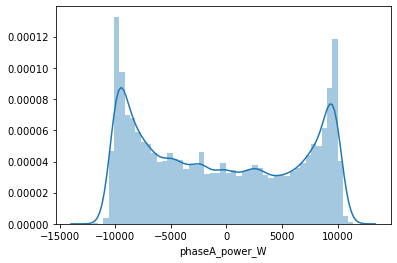

In [153]:
sns.distplot(df['phaseA_power_W'],kde=True)

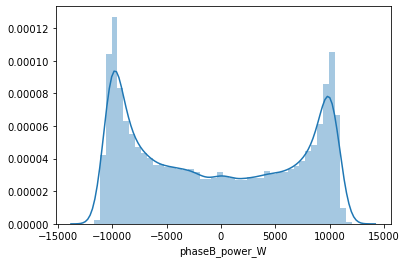

In [155]:
sns.distplot(df['phaseB_power_W'],kde=True)

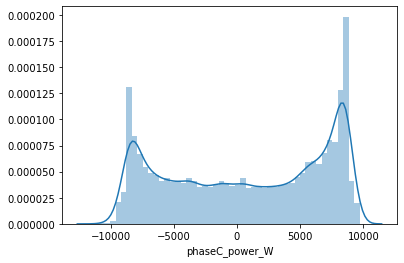

In [156]:
sns.distplot(df['phaseC_power_W'],kde=True)

## Statistical Testing to compare signals - HYPOTHESIS TESTING

Using a time window, it is possible to statistically compare two signals using t-test. The motivation is that under balanced conditions, signals on all phases should be samples from same overall distribution. This is will be indicated in the p-value of t-test. 

NULL HYOTHESIS - Signals on different phases (current, voltage, power) are from same distribution

ALTERNATIVE HYPOTHESIS - Signals of different phases are from different distribution

The idea is when these phases are subjected to minor disturbances before any major occurence (e.g. fault), distribution of signals on phases will start to differ, which will be reflected in p-value of t-test. This change in p-value can be used as a feature in predictive algorithms to predict any possible event.

In [182]:
stats.ttest_ind(a= df.loc[:1000,'phaseA.current.magnitude'],
                b= df.loc[:1000,'phaseA.current.magnitude'],
                equal_var=False)    

Ttest_indResult(statistic=0.0, pvalue=1.0)

In [177]:
stats.ttest_ind(a= df['phaseC.current.magnitude'],
                b= df['phaseB.current.magnitude'],
                equal_var=False)    

Ttest_indResult(statistic=-1387.7067544050951, pvalue=0.0)

In [186]:
stats.ttest_ind(a= df.loc[:5000,'phaseA_power_W'],
                b= df.loc[:5000,'phaseB_power_W'],
                equal_var=False)    

Ttest_indResult(statistic=-4.406753790731506, pvalue=1.0602771219914654e-05)

Ttest_indResult(statistic=-1.65205478185829, pvalue=0.09853914061238901)
Ttest_indResult(statistic=-4.893891657214783, pvalue=9.963410788941657e-07)
Ttest_indResult(statistic=-3.0300159789697263, pvalue=0.0024485812289833076)


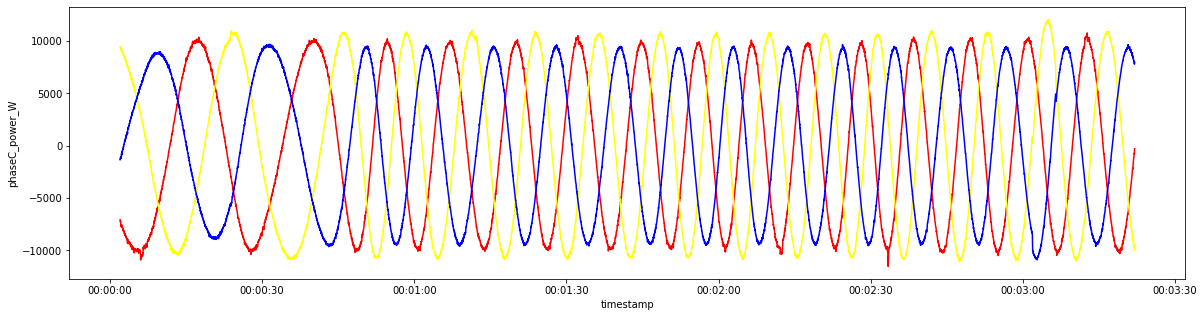

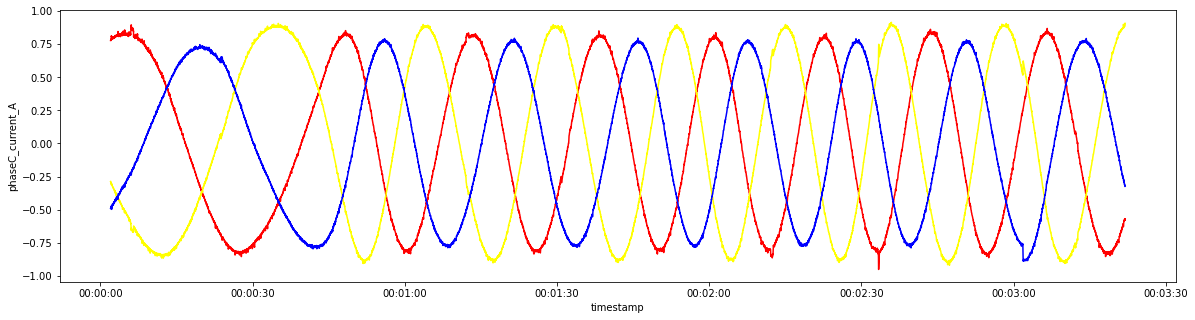

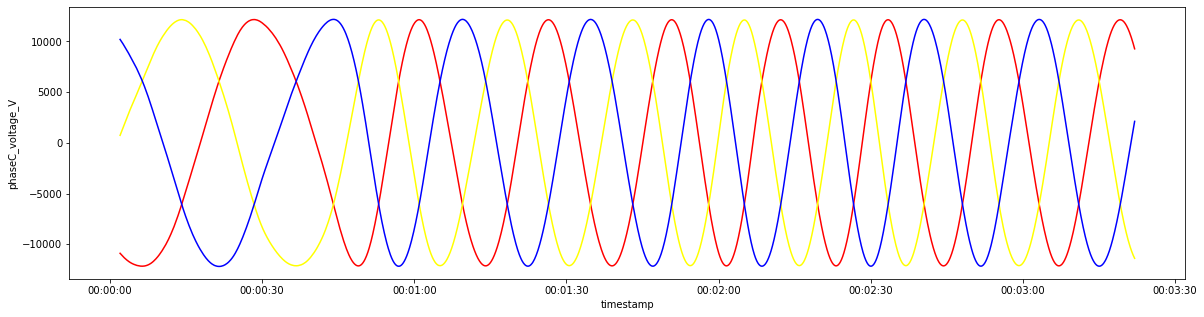

In [197]:
window_size=10000
start=100

f, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x='timestamp',y='phaseA_power_W',data=df.loc[start:(start+window_size),:],color='red')
sns.lineplot(x='timestamp',y='phaseB_power_W',data=df.loc[start:(start+window_size),:],color='yellow')
sns.lineplot(x='timestamp',y='phaseC_power_W',data=df.loc[start:(start+window_size),:],color='blue')

print(stats.ttest_ind(a= df.loc[start:(start+window_size),'phaseA_power_W'],
                b= df.loc[start:(start+window_size),'phaseB_power_W'],
                equal_var=False))

print(stats.ttest_ind(a= df.loc[start:(start+window_size),'phaseA_power_W'],
                b= df.loc[start:(start+window_size),'phaseC_power_W'],
                equal_var=False))

print(stats.ttest_ind(a= df.loc[start:(start+window_size),'phaseB_power_W'],
                b= df.loc[start:(start+window_size),'phaseC_power_W'],
                equal_var=False))


f1, ax1 = plt.subplots(figsize=(20, 5))
sns.lineplot(x='timestamp',y='phaseA_current_A',data=df.loc[start:(start+window_size),:],color='red')
sns.lineplot(x='timestamp',y='phaseB_current_A',data=df.loc[start:(start+window_size),:],color='yellow')
sns.lineplot(x='timestamp',y='phaseC_current_A',data=df.loc[start:(start+window_size),:],color='blue')


f2, ax2 = plt.subplots(figsize=(20, 5))
sns.lineplot(x='timestamp',y='phaseA_voltage_V',data=df.loc[start:(start+window_size),:],color='red')
sns.lineplot(x='timestamp',y='phaseB_voltage_V',data=df.loc[start:(start+window_size),:],color='yellow')
sns.lineplot(x='timestamp',y='phaseC_voltage_V',data=df.loc[start:(start+window_size),:],color='blue')


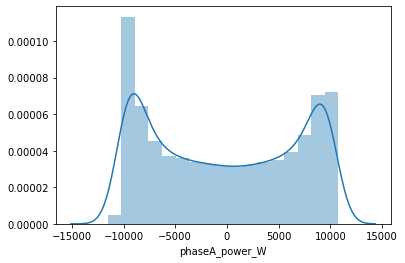

In [199]:
colnames =['phaseA_power_W','phaseB_power_W','phaseC_power_W']
sns.distplot(df.loc[start:(start+window_size),colnames[0]])

In [160]:
stats.ttest_ind(a= df['phaseA_power_W'],
                b= df['phaseC_power_W'],
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=-60.20134199856349, pvalue=0.0)

In [161]:
stats.ttest_ind(a= df['phaseC_power_W'],
                b= df['phaseB_power_W'],
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=53.49528983810823, pvalue=0.0)